In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [37]:
train = pd.read_csv(r'/content/train_LZdllcl.csv')
test = pd.read_csv(r'/content/test_2umaH9m.csv')

In [38]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [39]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [40]:
print(train.shape)
print(test.shape)

(54808, 14)
(23490, 13)


In [41]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [42]:
train.isnull().sum()/len(train)*100

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [43]:
test.isnull().sum()/len(test)*100

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.401873
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.713921
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
dtype: float64

# Data Cleaning

In [44]:
from scipy.stats import mode

In [45]:
train['previous_year_rating'].fillna((train['previous_year_rating'].mean()),inplace = True)
train['education'].fillna(mode(train['education']).mode[0], inplace=True)
test['previous_year_rating'].fillna((test['previous_year_rating'].mean()),inplace = True)
test['education'].fillna(mode(test['education']).mode[0], inplace=True)

In [46]:
train.isnull().sum()/len(train)*100, test.isnull().sum()/len(test)*100

(employee_id             0.0
 department              0.0
 region                  0.0
 education               0.0
 gender                  0.0
 recruitment_channel     0.0
 no_of_trainings         0.0
 age                     0.0
 previous_year_rating    0.0
 length_of_service       0.0
 KPIs_met >80%           0.0
 awards_won?             0.0
 avg_training_score      0.0
 is_promoted             0.0
 dtype: float64, employee_id             0.0
 department              0.0
 region                  0.0
 education               0.0
 gender                  0.0
 recruitment_channel     0.0
 no_of_trainings         0.0
 age                     0.0
 previous_year_rating    0.0
 length_of_service       0.0
 KPIs_met >80%           0.0
 awards_won?             0.0
 avg_training_score      0.0
 dtype: float64)

In [47]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 12), dpi=800, facecolor='w', edgecolor='k')

<Figure size 9600x9600 with 0 Axes>

<Figure size 9600x9600 with 0 Axes>

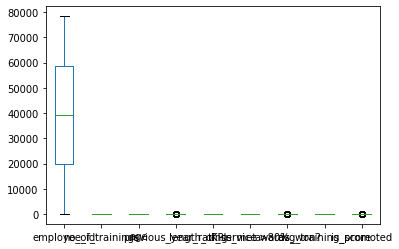

In [67]:
train.plot(kind='box')
plt.show()

In [49]:
def remove_outliers(col):
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return upper_range,lower_range

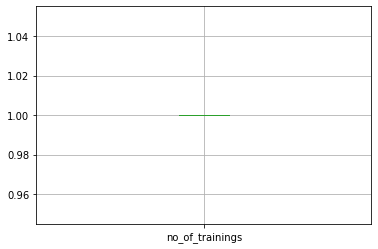

In [53]:
train.boxplot(column = ['no_of_trainings'])
plt.show()

In [51]:
upper_bound,lower_bound = remove_outliers(train['no_of_trainings'])
train['no_of_trainings'] = np.where(train['no_of_trainings']>=upper_bound,upper_bound,train['no_of_trainings'])
train['no_of_trainings'] = np.where(train['no_of_trainings']<=lower_bound,lower_bound,train['no_of_trainings'])

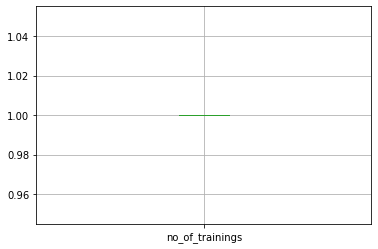

In [54]:
train.boxplot(column = ['no_of_trainings'])
plt.show()

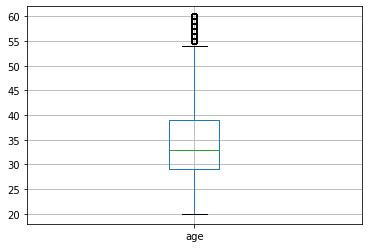

In [55]:
train.boxplot(column = ['age'])
plt.show()

In [56]:
upper_bound,lower_bound = remove_outliers(train['age'])
train['age'] = np.where(train['age']>=upper_bound,upper_bound,train['age'])
train['age'] = np.where(train['age']<=lower_bound,lower_bound,train['age'])

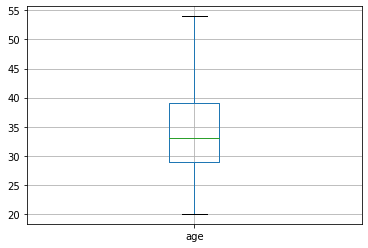

In [57]:
train.boxplot(column = ['age'])
plt.show()

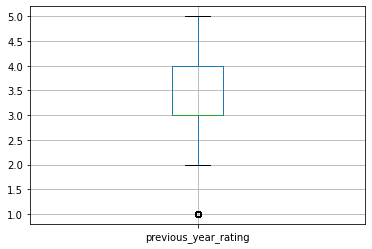

In [58]:
train.boxplot(column = ['previous_year_rating'])
plt.show()

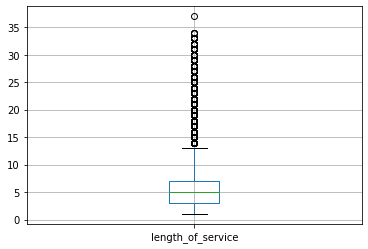

In [59]:
train.boxplot(column = ['length_of_service'])
plt.show()

In [60]:
upper_bound,lower_bound = remove_outliers(train['length_of_service'])
train['length_of_service'] = np.where(train['length_of_service']>=upper_bound,upper_bound,train['length_of_service'])
train['length_of_service'] = np.where(train['length_of_service']<=lower_bound,lower_bound,train['length_of_service'])

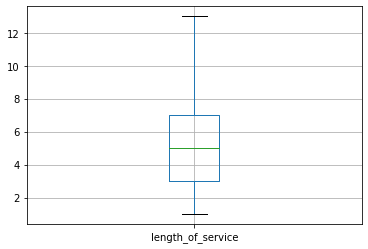

In [61]:
train.boxplot(column = ['length_of_service'])
plt.show()

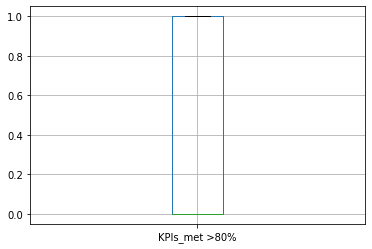

In [62]:
train.boxplot(column = ['KPIs_met >80%'])
plt.show()

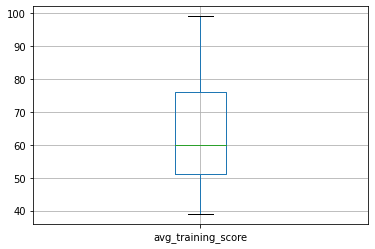

In [66]:
train.boxplot(column = ['avg_training_score'])
plt.show()

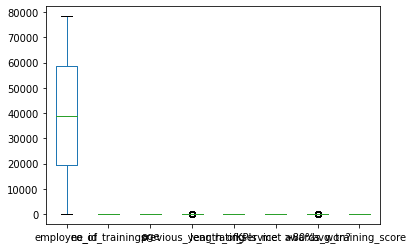

In [72]:
test.plot(kind='box')
plt.show()

In [69]:
upper_bound,lower_bound = remove_outliers(test['no_of_trainings'])
test['no_of_trainings'] = np.where(test['no_of_trainings']>=upper_bound,upper_bound,test['no_of_trainings'])
test['no_of_trainings'] = np.where(test['no_of_trainings']<=lower_bound,lower_bound,test['no_of_trainings'])

In [70]:
upper_bound,lower_bound = remove_outliers(test['age'])
test['age'] = np.where(test['age']>=upper_bound,upper_bound,test['age'])
test['age'] = np.where(test['age']<=lower_bound,lower_bound,test['age'])

In [71]:
upper_bound,lower_bound = remove_outliers(test['length_of_service'])
test['length_of_service'] = np.where(test['length_of_service']>=upper_bound,upper_bound,test['length_of_service'])
test['length_of_service'] = np.where(test['length_of_service']<=lower_bound,lower_bound,test['length_of_service'])

In [80]:
train.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings             1
age                        35
previous_year_rating        6
length_of_service          13
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
is_promoted                 2
dtype: int64

# EDA

In [74]:
train.is_promoted.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

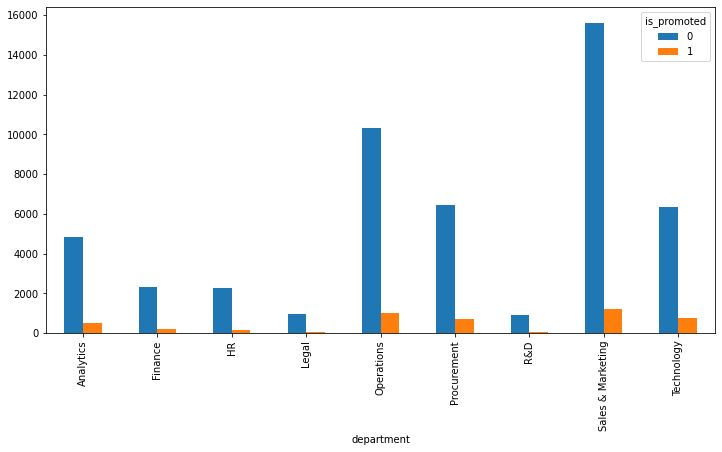

In [73]:
train.groupby(['department', 'is_promoted']).size().unstack().plot(kind='bar', figsize=(12,6))

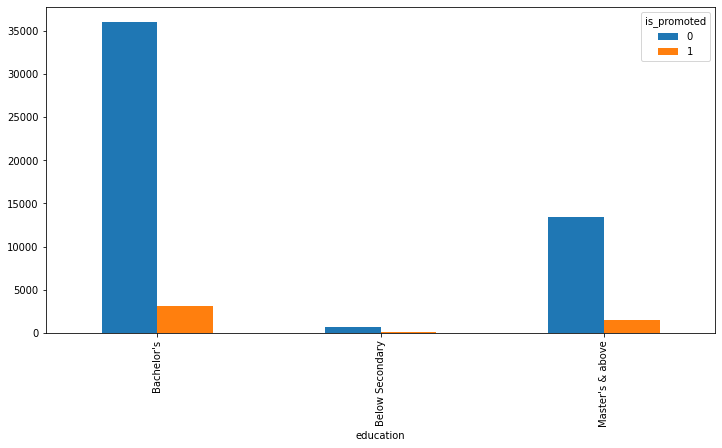

In [75]:
train.groupby(['education', 'is_promoted']).size().unstack().plot(kind='bar', figsize=(12,6))

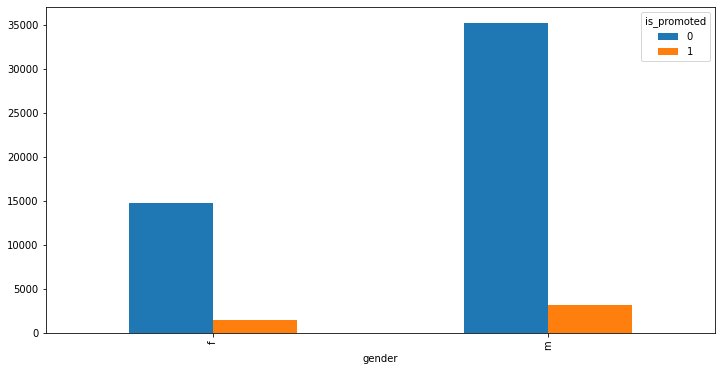

In [77]:
train.groupby(['gender', 'is_promoted']).size().unstack().plot(kind='bar', figsize=(12,6))

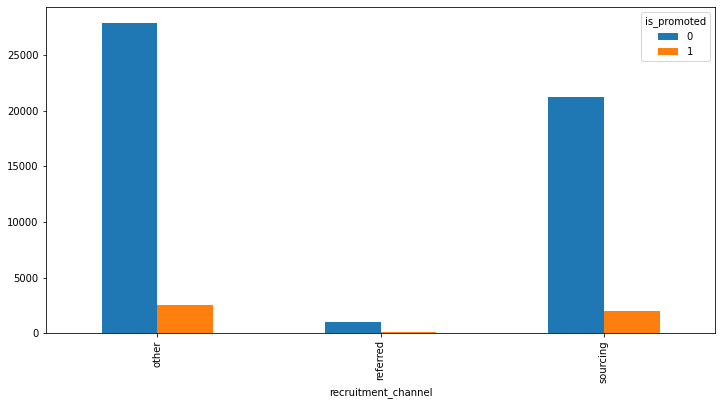

In [78]:
train.groupby(['recruitment_channel', 'is_promoted']).size().unstack().plot(kind='bar', figsize=(12,6))

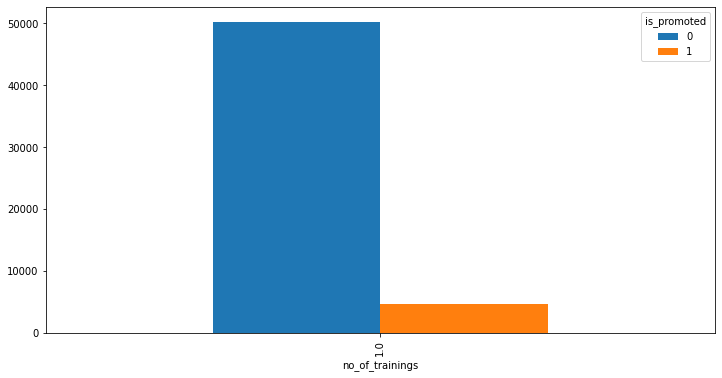

In [81]:
train.groupby(['no_of_trainings', 'is_promoted']).size().unstack().plot(kind='bar', figsize=(12,6))

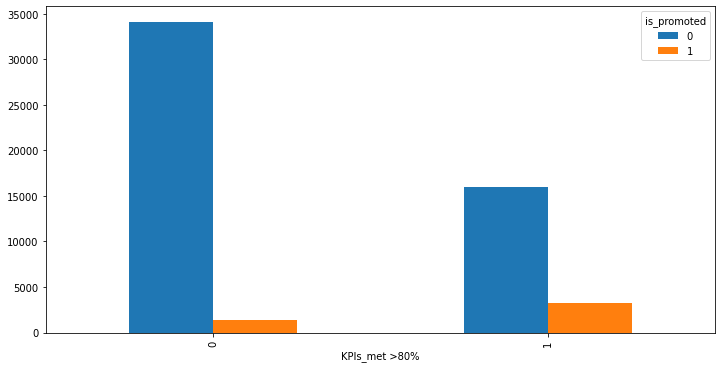

In [82]:
train.groupby(['KPIs_met >80%', 'is_promoted']).size().unstack().plot(kind='bar', figsize=(12,6))

# Label Encoder

In [83]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [84]:
gender=enc.fit_transform(train['gender'])
department=enc.fit_transform(train['department'])
region = enc.fit_transform(train['region'])
edu = enc.fit_transform(train['education'])
rec = enc.fit_transform(train['recruitment_channel'])

In [85]:
train['department'] = department
train['gender'] = gender
train['region'] = region
train['education'] = edu
train['recruitment_channel'] = rec

In [86]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1.0,35.0,5.0,8.0,1,0,49,0
1,65141,4,14,0,1,0,1.0,30.0,5.0,4.0,0,0,60,0
2,7513,7,10,0,1,2,1.0,34.0,3.0,7.0,0,0,50,0
3,2542,7,15,0,1,0,1.0,39.0,1.0,10.0,0,0,50,0
4,48945,8,18,0,1,0,1.0,45.0,3.0,2.0,0,0,73,0


In [87]:
gender=enc.fit_transform(test['gender'])
department=enc.fit_transform(test['department'])
region = enc.fit_transform(test['region'])
edu = enc.fit_transform(test['education'])
rec = enc.fit_transform(test['recruitment_channel'])

In [88]:
test['department'] = department
test['gender'] = gender
test['region'] = region
test['education'] = edu
test['recruitment_channel'] = rec

In [89]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,8,18,0,1,2,1.0,24.0,3.339146,1.0,1,0,77
1,74430,2,28,0,0,0,1.0,31.0,3.000000,5.0,0,0,51
2,72255,7,4,0,1,0,1.0,31.0,1.000000,4.0,0,0,47
3,38562,5,11,0,0,0,1.0,31.0,2.000000,9.0,0,0,65
4,64486,1,21,0,1,2,1.0,30.0,4.000000,7.0,0,0,61


# Model Training

In [90]:
X = train.drop(labels=['is_promoted'], axis=1)
y = train['is_promoted'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.15, random_state=42)

In [91]:
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((46586, 13), (46586,), (8222, 13), (8222,))

# Logistic Regression

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
clf = LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [97]:
lRpredict = clf.predict(X_cv)

In [98]:
print(accuracy_score(y_cv,lRpredict))

0.9205789345657991


In [100]:
confusion_matrix(y_cv,lRpredict)

array([[7569,    0],
       [ 653,    0]])

# Decision Tree

In [101]:
Dic = DecisionTreeClassifier()
Dic.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [102]:
DTpredict = Dic.predict(X_cv)

In [104]:
print(accuracy_score(y_cv,DTpredict))
print(confusion_matrix(y_cv,DTpredict))
print(classification_report(y_cv,DTpredict))

0.8994162004378496
[[7091  478]
 [ 349  304]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      7569
           1       0.39      0.47      0.42       653

    accuracy                           0.90      8222
   macro avg       0.67      0.70      0.68      8222
weighted avg       0.91      0.90      0.90      8222



# Random Forest

In [105]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [106]:
RFpredict = model.predict(X_cv)

In [107]:
print(accuracy_score(y_cv,RFpredict))
print(confusion_matrix(y_cv,RFpredict))
print(classification_report(y_cv,RFpredict))

0.938092921430309
[[7544   25]
 [ 484  169]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      7569
           1       0.87      0.26      0.40       653

    accuracy                           0.94      8222
   macro avg       0.91      0.63      0.68      8222
weighted avg       0.93      0.94      0.92      8222



# KNN

In [108]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [109]:
KNN_pred=knn.predict(X_cv)

In [110]:
print(accuracy_score(y_cv,KNN_pred))
print(confusion_matrix(y_cv,KNN_pred))
print(classification_report(y_cv,KNN_pred))

0.9160788129408903
[[7522   47]
 [ 643   10]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      7569
           1       0.18      0.02      0.03       653

    accuracy                           0.92      8222
   macro avg       0.55      0.50      0.49      8222
weighted avg       0.86      0.92      0.88      8222



# SVM

In [111]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [112]:
SV_pred=sv.predict(X_cv)

In [113]:
print(accuracy_score(y_cv,SV_pred))
print(confusion_matrix(y_cv,SV_pred))
print(print(classification_report(y_cv,SV_pred)))

0.9205789345657991
[[7569    0]
 [ 653    0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      7569
           1       0.00      0.00      0.00       653

    accuracy                           0.92      8222
   macro avg       0.46      0.50      0.48      8222
weighted avg       0.85      0.92      0.88      8222

None


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
